## K-Means

In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


初始化后的中心点
[[8. 7.]
 [8. 3.]
 [6. 5.]]


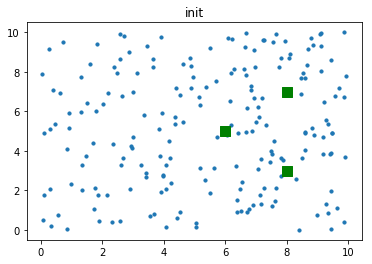

训练后的中心点
[[6.6594086 8.269299 ]
 [7.557336  2.9229927]
 [2.2470312 4.0426674]]
设有一点x : 0.7816224624681967  7.349270845032177
则x属于簇2,其中心点为 2.2470312118530273  4.042667388916016


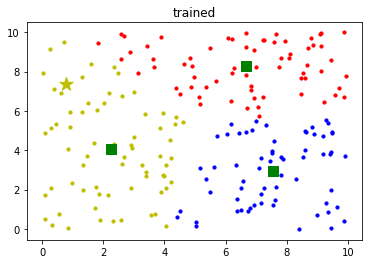

In [2]:
# 无监督算法
k = 3

X = np.random.random((200, 2))*10

C_x = np.random.randint(0, np.max(X), size=k)
C_y = np.random.randint(0, np.max(X), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

print('初始化后的中心点')
print(C)

plt.scatter(X[:, 0], X[:, 1], s=10)
plt.scatter(C[:, 0], C[:, 1], marker='s', s=100, c='g')
plt.title('init')
plt.show()

C_old = np.zeros(C.shape) 
clusters = np.zeros(len(X)) # 记录每个点所属的簇

def dist(a, b, ax=1):
    return np.linalg.norm(a-b,axis=ax) # 范数

error = sum(dist(C, C_old))

min_error = 0.0001
while error > min_error:
    # 计算每个样本到中心距离，更新所属的簇
    for i in range(len(X)):
        distances = dist(X[i], C)
        clusters[i] = np.argmin(distances) 
    # 计算新的中心点
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
        
    error = sum(dist(C, C_old))

print('训练后的中心点')
print(C)

x = np.random.random((1,2))*10
print('设有一点x : {}  {}'.format(x[0][0],x[0][1]))

distance = dist(x, C)
cluster = np.argmin(distance)
print('则x属于簇{},其中心点为 {}  {}'.format(cluster,C[cluster][0],C[cluster][1]))

colors = ['r', 'b', 'y', 'c', 'm']
fig = plt.figure()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    plt.scatter(points[:, 0], points[:, 1], s=10, c=colors[i])
plt.scatter(x[0][0], x[0][1], marker='*', s=200, c=colors[cluster])
plt.scatter(C[:, 0], C[:, 1], marker='s', s=100, c='g')
plt.title('trained')
plt.show() 
